In [3]:
print('假設跑步為a，跳繩為b')
a_mean=25
b_mean=10
a_std=2.3
b_std=5.9
a_cv = a_std / a_mean
b_cv = b_std / b_mean
print("跑步的變異係數:",a_cv)
print("跳繩的變異係數:",round(b_cv,3))


假設跑步為a，跳繩為b
跑步的變異係數: 0.092
跳繩的變異係數: 0.59


In [4]:
import os
print(os.getcwd())

C:\Users\xvpow\ai_python_20250727\ch11


In [5]:
import pandas as pd
import numpy as np
fortune = pd.read_csv("fortune1000.csv",index_col="Rank")
fortune.head()

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [8]:
a = fortune["Revenue"]
b = fortune["Employees"]
print(np.cov(a,b))
print(np.corrcoef(a,b))

[[8.30622323e+08 1.89144910e+09]
 [1.89144910e+09 8.17716725e+09]]
[[1.         0.72575731]
 [0.72575731 1.        ]]


### 單位矩陣與轉置矩陣

In [11]:
import numpy as np
array1 = np.eye(4)
print(array1)
array2=np.array([[3,5,6,8],
                 [13,25,46,98],
                 [111,234,556,567]])
print(np.transpose(array2))
print("="*20)
print(array2.T)


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[  3  13 111]
 [  5  25 234]
 [  6  46 556]
 [  8  98 567]]
[[  3  13 111]
 [  5  25 234]
 [  6  46 556]
 [  8  98 567]]


In [14]:
array1 = [[6,3],
          [8,10]]
array2 = [[2,1],
          [5,-3]]
n1 = np.array(array1)
n2 = np.array(array2)
n1 - n2

array([[ 12,   3],
       [ 40, -30]])

In [17]:
array1 = [[15,14,15],
          [12,13,17]]
array2 = [[10,14],
         [5,18],
         [8,10]]
a = np.array(array1)
b = np.array(array2)
print(np.dot(a,b))
print(a@b)

[[340 612]
 [321 572]]
[[340 612]
 [321 572]]


In [20]:
a = [[6,3],
    [8,10]]
b = [[2,1],
     [5,-3]]
a1 = np.array(a)
b1 = np.array(b)
print(a1@b1)
print(b1@a1)

[[ 27  -3]
 [ 66 -22]]
[[ 20  16]
 [  6 -15]]


In [24]:
a = [[6,3],
    [8,10]]
a1 = np.array(a)
one = np.eye(2)
print(a1@one)

[[ 6.  3.]
 [ 8. 10.]]


## 反矩陣（Inverse）


In [25]:
a = np.array([[4,-7],
              [2,-3]])
a_inv = np.linalg.inv(a)
print(a_inv)
print(a @ a_inv)

[[-1.5  3.5]
 [-1.   2. ]]
[[1. 0.]
 [0. 1.]]


In [31]:
a = np.array([[1,2],
              [4,8]])
a_inv = np.linalg.inv(a)

LinAlgError: Singular matrix

In [34]:
pric1 = np.array([[3,3.5],
                 [3.2,3.6]])
total =  [[118.4,135.2]]

pric1_inv = np.linalg.inv(pric1)
c = total @ pric1_inv
print(c)

[[16. 22.]]


In [35]:
import pandas as pd
tvmarketing = pd.read_csv("tvmarketing.csv")
tvmarketing.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [36]:
tvmarketing.isnull().any()

TV       False
Sales    False
dtype: bool

In [37]:
tvmarketing.dtypes

TV       float64
Sales    float64
dtype: object

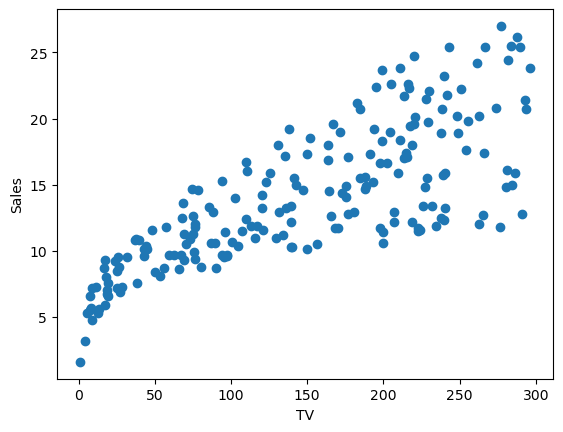

In [38]:
import matplotlib.pyplot as plt
plt.scatter(tvmarketing["TV"],tvmarketing["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
X = tvmarketing["TV"]
y = tvmarketing["Sales"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)#test_size表示測試資料 30%
X.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape


((200,), (140,), (60,), (140,), (60,))

In [73]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X_train = np.array(X_train).reshape(-1,1)
print(X_train.shape)
model.fit(X_train,y_train)

(140, 1)


LinearRegression()

In [74]:
print("斜率:",model.coef_) 
print("截距:",model.intercept_) 

斜率: [0.04627053]
截距: 7.18843208837041


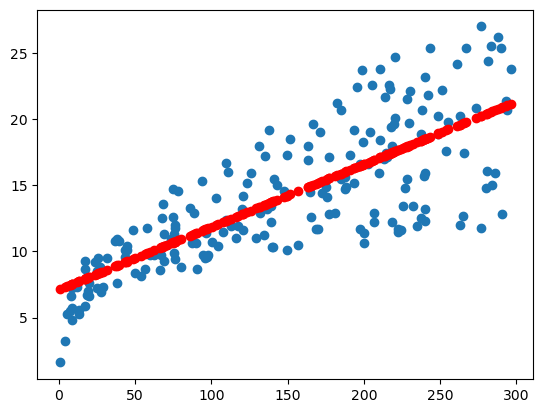

In [67]:
import matplotlib.pyplot as plt
y2 = (model.coef_)*X + model.intercept_
plt.scatter(X,y)
plt.scatter(X,y2,c="red")
plt.show()

In [75]:
X_test = np.array(X_test).reshape(-1,1)
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

8.81672267983711

## 聯立方程式計算

In [77]:
import sympy as sp
x = sp.Symbol("x")
y = sp.Symbol("y")
f1 =2*x + 3 *y - 23
f2 = x + 4 *y - 24
print(sp.solve([f1,f2],[x,y]))

{x: 4, y: 5}
